In [545]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [546]:
def func(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    result = 0
    rel = ( x - mu )/sig
    
    if rel < -1 * alphaL:
        result = AL * (BL - rel)**(-nL)
    elif (rel >= -1 * alphaL) and (rel <= alphaR):
        result = np.exp(-1 * rel**2 / 2)
    elif rel > alphaR:
        result = AR*(BR + rel)**(-nR)

    noise = np.random.randn()/500
    return (result+noise*(noise>=0))*N #/ (np.sqrt(2 * np.pi) * sig)


10190.217887281735


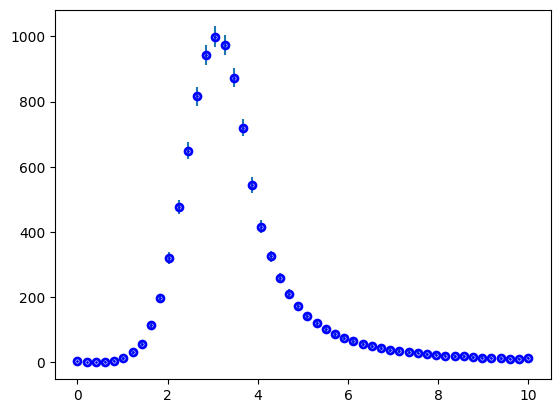

In [547]:
N = 1000
mu = 3.1
sig = 0.70
alphaL = 10
alphaR = 1
nL= 3
nR= 3

x = np.linspace(0, 10, 50)
x_data = np.array(x)
y_data = np.array([func(j, N, mu, sig, alphaL, nL, alphaR, nR) for j in x_data])
y_error = np.sqrt(y_data)
plt.errorbar(x, y_data, y_error, marker='o', mfc='blue',
         mec='blue', ms=2, mew=5, ls='')
print(y_data.sum())

In [548]:
def funcVec(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def funcVec2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    result = 0
    result += AL * (BL - (( x - mu )/sig))**(-nL) * (( x - mu )/sig < -1 * alphaL).all()
    result += np.exp(-1 * (( x - mu )/sig)**2 / 2) * ((( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR)).all()
    result += AR * (BR + ( x - mu )/sig)**(-nR) * (( x - mu )/sig > alphaR).all()
    result *= N
    
    return result

def funcVec3(x, N, mu, sigma, alpha, n, alphabis, nbis):
    A = ((n/np.abs(alpha))**n)*np.exp(-(np.abs(alpha)**2)/2.)
    B = (n/np.abs(alpha))-np.abs(alpha)
    C = ((nbis/np.abs(alphabis))**n)*np.exp(-(np.abs(alphabis)**2)/2.)
    D = (nbis/np.abs(alphabis))-np.abs(alphabis)
    y = np.array([], dtype=float)
    for i in x:
        if(((i-mu)/sigma > alpha) and ((i-mu)/sigma < alphabis)):
            y = np.append(y, np.exp(-((i-mu)**2)/(2*sigma**2)))
        elif ((i-mu)/sigma < alpha):
            y = np.append(y, A*((B- (i -mu)/(sigma))**(-n)))
        elif((i-mu)/sigma > alphabis):
            y = np.append(y, C*((D+ (i -mu)/(sigma))**(-nbis)))
        else:
            y = np.append(y, 0.)
    return y*N

params: 
 [9.99486516e+02 3.10143265e+00 7.03353615e-01 1.54222782e+01
 2.40767803e+00 1.01289715e+00 2.90589184e+00]
covariance: 
 [[ 1.84189271e+01 -3.04787414e-03 -6.55687592e-03  5.48982648e-18
   0.00000000e+00  1.62748549e-03 -2.05479607e-02]
 [-3.04787414e-03  1.46300752e-05  6.84368770e-06  3.10211461e-20
   0.00000000e+00  3.06448840e-05 -1.28581846e-04]
 [-6.55687592e-03  6.84368770e-06  8.12575850e-06  1.67258167e-20
   0.00000000e+00  2.00209150e-05 -6.95584781e-05]
 [ 5.48982648e-18  3.10211461e-20  1.67258167e-20  4.02012802e-34
   0.00000000e+00  2.42509126e-19 -1.68543794e-18]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.62748549e-03  3.06448840e-05  2.00209150e-05  2.42509126e-19
   0.00000000e+00  1.81317191e-04 -1.01159554e-03]
 [-2.05479607e-02 -1.28581846e-04 -6.95584781e-05 -1.68543794e-18
   0.00000000e+00 -1.01159554e-03  7.06735202e-03]]
residual: 
 {'nfev': 70, 'fvec': array([-1.72323

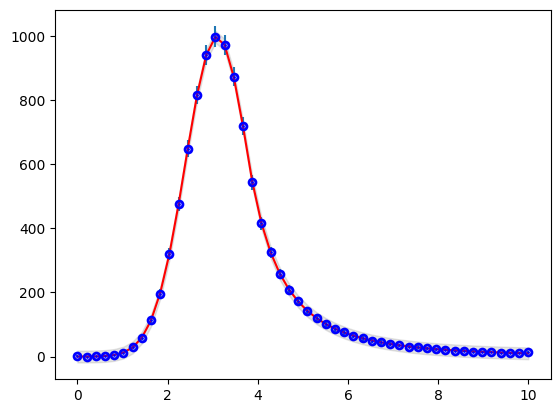

In [549]:
bnds = ((0, 2.0, 0.5, 0, 1, 0, 1), (np.inf, 5.0, 1, 20, 4, 20, 4))

params, covs, residual, fjac, other = curve_fit(funcVec, x_data, y_data, sigma=y_error, p0=[1, 2, 1, 1, 1, 1, 1], bounds=bnds, method='trf', full_output=True) 
print("params: \n", params) 
print("covariance: \n", covs)
print("residual: \n", residual)

y_fit = funcVec(x_data, *params)
plt.errorbar(x, y_data, y_error, marker='o', mfc='blue',
         mec='blue', ms=2, mew=5, ls='')
plt.plot(x, y_fit, color='red')

sigmas = np.diag(covs)**2
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)

plt.fill_between(x, y_fit - e_fit, y_fit + e_fit,
                 color='gray', alpha=0.2)
    


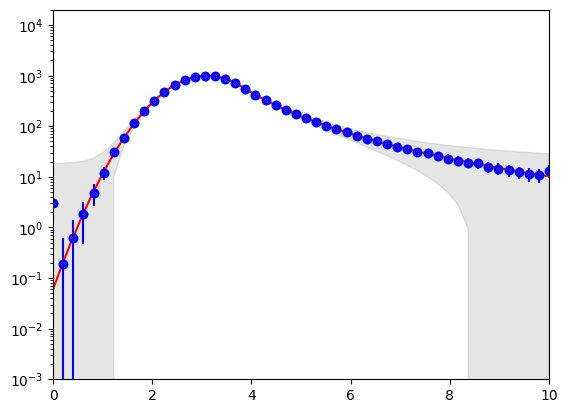

In [570]:
plt.show()
plt.ylim([0.001,20000])
plt.xlim([0,10])
plt.semilogy(x, y_data, 'o')
plt.errorbar(x, y_data, y_error, marker='o', mfc='blue',
         mec='blue', ms=2, mew=5, ls='', color='blue')
plt.plot(x, y_fit, color='red')
plt.fill_between(x, y_fit - e_fit, y_fit + e_fit,
                 color='gray', alpha=0.2)


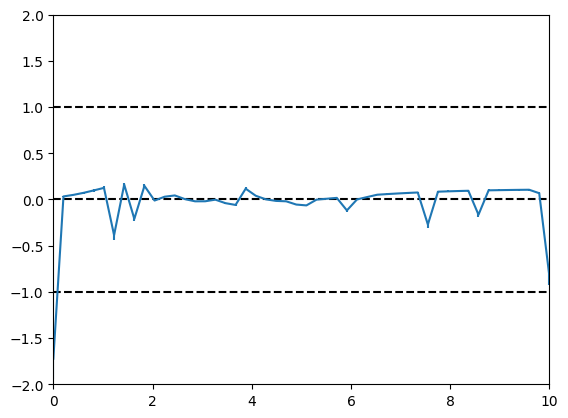

In [565]:
#res = y_data-y_fit
err = np.sqrt(residual['fvec']**2/(residual['nfev']-len(params)))
plt.axis((0,10, -2, 2))
plt.errorbar(x, residual['fvec'], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

x1, y1, yup, ydown = [0, 10], [0, 0], [1, 1], [-1, -1]
plt.plot(x1, y1, linestyle='--', color="black")
plt.plot(x1, yup, linestyle='--', color="black")
plt.plot(x1, ydown, linestyle='--', color="black")